In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LogisticRegressionDataset.csv')
df = pd.DataFrame(data)
df

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16',
'Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30', 'Unnamed: 31'], axis=1, inplace=True)

In [4]:
df

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,A
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,A
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,A
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,A
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,A
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,C
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,C
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,C
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,C


Selecting out x_inputs and y_outputs of our data ( datas and labels )

In [5]:
x_inputs = df.iloc[:, 0: -1].values

In [6]:
y_outputs = df.iloc[:, -1].values

In [9]:
y_outputs

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=object)

One-hot encoding

In [10]:
y_A = (y_outputs == 'A').astype(int)
y_B = (y_outputs == 'B').astype(int)
y_C = (y_outputs == 'C').astype(int)

In [15]:
y_A

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

Adding Bias Terms to our dataset

In [20]:
newt = x_inputs.shape[0], 1
print(newt)
x_inputs

(177, 1)


array([[1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [25]:
x_inputs = np.hstack([np.ones(newt), x_inputs])

In [26]:
x_inputs

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [1.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Shuffling out data

In [28]:
x_inputs_sh = []
y_outputs_sh = []
data_len = len(df)
per_list = np.random.permutation(data_len)

for i in range(data_len):
    per_idx = per_list[i]
    tmp_input = x_inputs[per_idx]
    tmp_output = y_outputs[per_idx]
    
    x_inputs_sh.append(tmp_input)
    y_outputs_sh.append(tmp_output)

# turning x_inputs and y_outputs into numpy array if needed
x_inputs_sh = np.array(x_inputs_sh)
y_outputs_sh = np.array(y_outputs_sh)

In [29]:
len(x_inputs_sh)

177

Splitting Our Test and Train Data

In [31]:
trn_test_split = int(0.70 * len(x_inputs_sh))
x_train = x_inputs_sh[0:trn_test_split, :]
y_train = y_outputs_sh[0: trn_test_split]
x_test = x_inputs_sh[trn_test_split:, :]
y_test = y_outputs_sh[trn_test_split:, ]

one-hot encoding train test split

In [32]:
y_train_A = (y_train == 'A').astype(int)
y_train_B = (y_train == 'B').astype(int)
y_train_C = (y_train == 'C').astype(int)

Normalizing Our data

In [34]:
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)

epsilon = 1e-5

x_train_normalized = (x_train - mu) / (sigma + epsilon)
x_test_normalized = (x_test - mu) / (sigma + epsilon)

In [35]:
x_train_normalized

array([[ 0.        , -0.66312818, -0.66843473, ...,  0.45860168,
         0.52859829, -1.26322478],
       [ 0.        ,  0.71586285,  0.70246172, ..., -1.51488076,
        -1.72039522, -0.74946792],
       [ 0.        ,  0.99676843, -0.83185285, ..., -0.25521112,
         0.40666491,  1.852462  ],
       ...,
       [ 0.        ,  0.28173605,  1.11100702, ..., -1.47289177,
        -1.20556538,  0.34433701],
       [ 0.        , -1.76121362, -0.26896821, ..., -0.08725517,
         1.51761351, -0.86547753],
       [ 0.        , -1.11002342, -0.16910159, ..., -0.38117808,
         0.96213921, -1.15384429]])

Compute Cost and Gradient Descent Function

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [39]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost.item()

In [40]:
x_inputs.shape

(177, 14)

In [41]:
def gradient_descent(X, y_A, y_B, y_C, alpha=0.01, iterations=500):
    m, n = X.shape
    labels_count = 3
    thetas = np.zeros((n, labels_count))
    costs = []

    for iteration in range(iterations):
        acts = sigmoid(np.dot(X, thetas))
        
        cost_a = cost_function(thetas[:, 0], X, y_A)
        cost_b = cost_function(thetas[:, 1], X, y_B)
        cost_c = cost_function(thetas[:, 2], X, y_C)
        cost_avg = (cost_a + cost_b + cost_c) / labels_count

        costs.append(cost_avg)
        
        errors = acts - np.column_stack((y_A, y_B, y_C))
        gradients = np.dot(X.T, errors) / m

        # Update weights using gradient descent
        thetas -= alpha * gradients
    return thetas, costs

Defining prediction and accuracy functions

In [42]:
def pred(X, theta):
    scores = np.dot(X, theta)
    probabilities = sigmoid(scores)
    predictions = np.argmax(probabilities, axis=1)
    return predictions
def return_acc(predictions, targets):
    index_to_label = {
        0: 'A',
        1: 'B',
        2: 'C',
    }
    predicted_labels = [index_to_label[prediction] for prediction in predictions]
    correct_predictions = sum(1 for prediction, target in zip(predicted_labels, targets) if prediction == target)
    accuracy_percentage = (correct_predictions / len(targets)) * 100
    return accuracy_percentage

In [70]:
thetas, costs = gradient_descent(x_train_normalized, y_train_A, y_train_B, y_train_C, alpha=0.01, iterations=200)

In [71]:
thetas

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.34043536, -0.46425753,  0.1441207 ],
       [-0.03083418, -0.17068572,  0.2152775 ],
       [ 0.12793298, -0.19941201,  0.07678397],
       [-0.25269719,  0.09605068,  0.15455716],
       [ 0.12771785, -0.1228587 , -0.00505835],
       [ 0.2128595 ,  0.01028858, -0.22804044],
       [ 0.25599837,  0.07462934, -0.33837377],
       [-0.13051976, -0.01393979,  0.15249024],
       [ 0.08260409,  0.10113987, -0.18940491],
       [ 0.07237974, -0.38787679,  0.3425901 ],
       [ 0.11142364,  0.22562662, -0.34874109],
       [ 0.21619573,  0.12431025, -0.35475363],
       [ 0.45214978, -0.36793101, -0.07013409]])

In [72]:
pred_val = pred(x_test_normalized, thetas)

In [73]:
pred_val

array([1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 1, 0, 0, 0, 0, 1, 1, 2, 1], dtype=int64)

In [74]:
y_outputs_sh # 1:B 0:A 2:C

array(['B', 'C', 'A', 'A', 'B', 'B', 'C', 'B', 'A', 'C', 'C', 'C', 'B',
       'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A',
       'B', 'B', 'B', 'A', 'B', 'A', 'C', 'C', 'A', 'B', 'C', 'C', 'C',
       'A', 'B', 'C', 'A', 'C', 'A', 'A', 'B', 'C', 'A', 'C', 'C', 'B',
       'A', 'A', 'C', 'B', 'C', 'A', 'A', 'C', 'B', 'A', 'C', 'B', 'C',
       'B', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A',
       'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'A', 'B', 'C',
       'B', 'B', 'C', 'C', 'B', 'A', 'B', 'C', 'C', 'C', 'A', 'C', 'B',
       'B', 'B', 'A', 'B', 'C', 'C', 'B', 'B', 'A', 'C', 'B', 'B', 'A',
       'B', 'B', 'C', 'C', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'C',
       'A', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'B', 'B',
       'B', 'A', 'A', 'A', 'C', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'C',
       'B', 'C', 'C', 'B', 'A', 'A', 'C', 'A', 'B', 'B', 'B', 'C', 'B',
       'A', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

In [75]:
print("pred first 5", pred_val[:5])

pred first 5 [1 0 1 0 0]


In [76]:
acc_true = return_acc(pred_val, y_outputs_sh[trn_test_split:])
print(f'acc on test is: {acc_true:.2f}%')

acc on test is: 94.44%


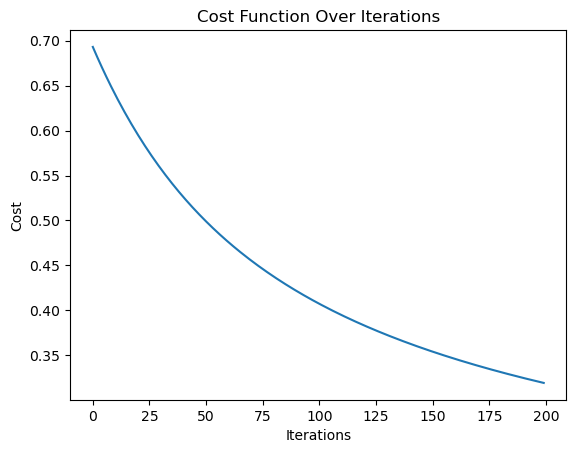

In [77]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()